# Recognizing Human Activities using Smartphones
## Classification on Smartphone-Based Recognition of Human Activities and Postural Transitions Dataset

In [138]:
# load packages
library(repr)
library(tidyverse)
library(tidymodels)

# set the seed
set.seed(1)

In [1]:
# Data source: http://archive.ics.uci.edu/ml/datasets/Smartphone-Based+Recognition+of+Human+Activities+and+Postural+Transitions#
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"

# Specifying destination where file should be saved
destfile <- "data/localfile.zip"

# Apply download.file function 
download.file(url, destfile)

unzip ("data/localfile.zip", exdir = "data/")

In [139]:
# create a vector of features to use for col names of training set
# X1 represents the row number
# X2 is the features
features_table <- read_delim("data/UCI HAR Dataset/features.txt", delim = " ", col_names = FALSE)
glimpse(features_table)
features_vector <- dplyr::pull(features_table, 'X2')
features_vector_sub <- gsub("-", "_", features_vector)

features_vector_sub <- gsub("[()]", "", features_vector_sub)
glimpse(features_vector_sub)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_character()
)



Rows: 561
Columns: 2
$ X1 <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…
$ X2 <chr> "tBodyAcc-mean()-X", "tBodyAcc-mean()-Y", "tBodyAcc-mean()-Z", "tB…
 chr [1:561] "tBodyAcc_mean_X" "tBodyAcc_mean_Y" "tBodyAcc_mean_Z" ...


In [140]:
# create a table of activity labels to add such a variable as a column into the training set data frame.
label_col_name_vec <- c('activity_label')
y_training_label <- read_delim("data/UCI HAR Dataset/train/y_train.txt", delim = " ", col_names = label_col_name_vec) 

y_testing_label <- read_delim("data/UCI HAR Dataset/test/y_test.txt", delim = " ", col_names = label_col_name_vec) 

Parsed with column specification:
cols(
  activity_label = col_double()
)

Parsed with column specification:
cols(
  activity_label = col_double()
)



In [143]:
# read feature values 
x_training_data <- read_delim("data/UCI HAR Dataset/train/X_train.txt", delim = " ", col_names = features_vector_sub)

x_testing_data <- read_delim("data/UCI HAR Dataset/test/X_test.txt", delim = " ", col_names = features_vector_sub)
x_testing_data

Warning message:
“Duplicated column names deduplicated: 'fBodyAcc_bandsEnergy_1,8' => 'fBodyAcc_bandsEnergy_1,8_1' [317], 'fBodyAcc_bandsEnergy_9,16' => 'fBodyAcc_bandsEnergy_9,16_1' [318], 'fBodyAcc_bandsEnergy_17,24' => 'fBodyAcc_bandsEnergy_17,24_1' [319], 'fBodyAcc_bandsEnergy_25,32' => 'fBodyAcc_bandsEnergy_25,32_1' [320], 'fBodyAcc_bandsEnergy_33,40' => 'fBodyAcc_bandsEnergy_33,40_1' [321], 'fBodyAcc_bandsEnergy_41,48' => 'fBodyAcc_bandsEnergy_41,48_1' [322], 'fBodyAcc_bandsEnergy_49,56' => 'fBodyAcc_bandsEnergy_49,56_1' [323], 'fBodyAcc_bandsEnergy_57,64' => 'fBodyAcc_bandsEnergy_57,64_1' [324], 'fBodyAcc_bandsEnergy_1,16' => 'fBodyAcc_bandsEnergy_1,16_1' [325], 'fBodyAcc_bandsEnergy_17,32' => 'fBodyAcc_bandsEnergy_17,32_1' [326], 'fBodyAcc_bandsEnergy_33,48' => 'fBodyAcc_bandsEnergy_33,48_1' [327], 'fBodyAcc_bandsEnergy_49,64' => 'fBodyAcc_bandsEnergy_49,64_1' [328], 'fBodyAcc_bandsEnergy_1,24' => 'fBodyAcc_bandsEnergy_1,24_1' [329], 'fBodyAcc_bandsEnergy_25,48' => 'fBodyAcc_ba

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_meanFreq,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean"
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2.5717778e-001,-2.3285230e-002,-1.4653762e-002,-9.3840400e-001,-9.2009078e-001,-6.6768331e-001,-9.5250112e-001,-9.2524867e-001,-6.7430222e-001,-8.9408755e-001,⋯,7.1645446e-002,-3.3037044e-001,-7.0597388e-001,6.4624029e-003,1.6291982e-001,-8.2588562e-001,2.7115145e-001,-7.2000927e-001,2.7680104e-001,-5.7978304e-002
2.8602671e-001,-1.3163359e-002,-1.1908252e-001,-9.7541469e-001,-9.6745790e-001,-9.4495817e-001,-9.8679880e-001,-9.6840133e-001,-9.4582340e-001,-8.9408755e-001,⋯,-4.0118872e-001,-1.2184509e-001,-5.9494387e-001,-8.3494968e-002,1.7499572e-002,-4.3437455e-001,9.2059323e-001,-6.9809082e-001,2.8134292e-001,-8.3898014e-002
2.7548482e-001,-2.6050420e-002,-1.1815167e-001,-9.9381904e-001,-9.6992551e-001,-9.6274798e-001,-9.9440345e-001,-9.7073498e-001,-9.6348267e-001,-9.3926027e-001,⋯,6.2891313e-002,-1.9042189e-001,-6.4073573e-001,-3.4956250e-002,2.0230203e-001,6.4103354e-002,1.4506843e-001,-7.0277146e-001,2.8008303e-001,-7.9346197e-002
2.7029822e-001,-3.2613869e-002,-1.1752018e-001,-9.9474279e-001,-9.7326761e-001,-9.6709068e-001,-9.9527433e-001,-9.7447101e-001,-9.6889736e-001,-9.3860975e-001,⋯,1.1669529e-001,-3.4441804e-001,-7.3612380e-001,-1.7067021e-002,1.5443783e-001,3.4013408e-001,2.9640709e-001,-6.9895383e-001,2.8411379e-001,-7.7108002e-002
2.7483295e-001,-2.7847788e-002,-1.2952716e-001,-9.9385248e-001,-9.6744548e-001,-9.7829499e-001,-9.9411140e-001,-9.6595259e-001,-9.7734600e-001,-9.3860975e-001,⋯,-1.2171128e-001,-5.3468487e-001,-8.4659517e-001,-2.2226521e-003,-4.0046393e-002,7.3671509e-001,-1.1854473e-001,-6.9224496e-001,2.9072202e-001,-7.3856810e-002
2.7921995e-001,-1.8620399e-002,-1.1390197e-001,-9.9445523e-001,-9.7041688e-001,-9.6531629e-001,-9.9458514e-001,-9.6948060e-001,-9.6589686e-001,-9.3785626e-001,⋯,8.3602937e-002,-4.9351743e-001,-8.5756454e-001,-9.5680522e-002,4.8848813e-002,7.6068392e-001,-7.2216361e-002,-6.8981607e-001,2.9489576e-001,-6.8470704e-002
2.7974586e-001,-1.8271026e-002,-1.0399988e-001,-9.9581919e-001,-9.7635361e-001,-9.7772468e-001,-9.9599613e-001,-9.7366485e-001,-9.7925263e-001,-9.3785626e-001,⋯,2.7233903e-001,-9.3854793e-002,-3.9128631e-001,-3.0908339e-001,-8.5737628e-004,7.2851378e-001,-3.3377136e-001,-6.9008490e-001,2.9528184e-001,-6.7065291e-002
2.7460055e-001,-2.5035130e-002,-1.1683085e-001,-9.9559442e-001,-9.8206892e-001,-9.8526237e-001,-9.9534087e-001,-9.8148490e-001,-9.8460957e-001,-9.4126341e-001,⋯,2.1379941e-001,-3.3812347e-001,-6.7235827e-001,-2.5526125e-002,-2.1403325e-001,4.3763954e-001,-3.6667425e-001,-6.8878544e-001,2.9598103e-001,-6.7705706e-002
2.7252874e-001,-2.0954013e-002,-1.1447249e-001,-9.9678413e-001,-9.7590627e-001,-9.8659699e-001,-9.9702932e-001,-9.7373534e-001,-9.8555648e-001,-9.4126341e-001,⋯,2.8342812e-001,-6.2959890e-001,-8.5324785e-001,1.4462627e-001,-3.5564025e-002,-1.8179978e-001,8.7319873e-002,-6.8539006e-001,2.9939413e-001,-6.5491372e-002


In [144]:
# add activity label column
training_set_all <- bind_cols(x_training_data, y_training_label)
tail(training_set_all)

testing_set_all <- bind_cols(x_testing_data, y_testing_label)
tail(testing_set_all)

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2.3796648e-001,-1.0878070e-003,-1.4832590e-001,-2.1894876e-001,-1.2926748e-002,1.7001874e-001,-3.0959929e-001,-4.1392263e-002,2.0745436e-001,2.1079544e-001,⋯,-5.9248831e-001,-8.6723607e-001,3.5277575e-001,-6.0481685e-001,-7.7478312e-001,7.3014246e-001,-7.9727183e-001,2.3499575e-001,4.8907023e-002,2
2.9966534e-001,-5.7193414e-002,-1.8123302e-001,-1.9538652e-001,3.9904850e-002,7.7078081e-002,-2.8230064e-001,4.3615631e-002,6.0410083e-002,2.1079544e-001,⋯,-5.8843274e-001,-8.8032443e-001,-1.9043686e-001,8.2971842e-001,2.0697215e-001,-4.2561858e-001,-7.9188305e-001,2.3860439e-001,4.9819139e-002,2
2.7385271e-001,-7.7493259e-003,-1.4746837e-001,-2.3530853e-001,4.8162805e-003,5.9279994e-002,-3.2255234e-001,-2.9456250e-002,8.0585116e-002,1.1744028e-001,⋯,-3.9073832e-001,-6.8074445e-001,6.4906712e-002,8.7567905e-001,-8.7903279e-001,4.0021936e-001,-7.7183960e-001,2.5267595e-001,5.0052558e-002,2
2.7338737e-001,-1.7010616e-002,-4.5021828e-002,-2.1821818e-001,-1.0382198e-001,2.7453270e-001,-3.0451515e-001,-9.8913034e-002,3.3258449e-001,4.3998772e-002,⋯,2.5145333e-002,-3.0402936e-001,5.2805928e-002,-2.6672437e-001,8.6440401e-001,7.0116882e-001,-7.7913261e-001,2.4914484e-001,4.0811188e-002,2
2.8965416e-001,-1.8843044e-002,-1.5828059e-001,-2.1913944e-001,-1.1141169e-001,2.6889320e-001,-3.1048749e-001,-6.8200325e-002,3.1947326e-001,1.0170184e-001,⋯,6.3906883e-002,-3.4431361e-001,-1.0136012e-001,7.0073969e-001,9.3667394e-001,-5.8947895e-001,-7.8518142e-001,2.4643223e-001,2.5339478e-002,2
3.5150347e-001,-1.2423118e-002,-2.0386717e-001,-2.6927044e-001,-8.7211541e-002,1.7740393e-001,-3.7740405e-001,-3.8678063e-002,2.2942952e-001,2.6901269e-001,⋯,-3.8705200e-001,-7.4073820e-001,-2.8008805e-001,-7.7392783e-003,-5.6087594e-002,-6.1695645e-001,-7.8326693e-001,2.4680852e-001,3.6694843e-002,2


tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1.9227459e-001,-3.3642566e-002,-1.0594911e-001,-3.5484079e-001,-9.2504346e-002,-3.1290968e-001,-4.3357927e-001,-8.8741465e-002,-3.3605968e-001,-4.1623509e-002,⋯,-6.2965677e-001,-9.1649344e-001,5.3598268e-001,6.8930613e-001,-9.3660649e-001,5.6237487e-001,-6.4675433e-001,2.8215019e-001,1.8115158e-001,2
3.1015462e-001,-5.3391250e-002,-9.9108716e-002,-2.8786635e-001,-1.4058918e-001,-2.1508773e-001,-3.5608315e-001,-1.4877483e-001,-2.3205733e-001,1.8536146e-001,⋯,-3.7627777e-001,-7.5080906e-001,-3.3742157e-001,3.4629489e-001,8.8490383e-001,-6.9888508e-001,-6.5173235e-001,2.7462678e-001,1.8478430e-001,2
3.6338465e-001,-3.9214016e-002,-1.0591509e-001,-3.0538795e-001,2.8147742e-002,-1.9637291e-001,-3.7353982e-001,-3.0036042e-002,-2.7023668e-001,1.8536146e-001,⋯,-3.2041786e-001,-7.0027424e-001,-7.3670095e-001,-3.7288894e-001,-6.5742051e-001,3.2254850e-001,-6.5518092e-001,2.7357825e-001,1.8241215e-001,2
3.4996609e-001,3.0077442e-002,-1.1578796e-001,-3.2963808e-001,-4.2142894e-002,-2.5018068e-001,-3.8801695e-001,-1.3325698e-001,-3.4702897e-001,7.4714557e-003,⋯,-1.1885353e-001,-4.6717918e-001,-1.8156041e-001,8.8574068e-002,6.9666350e-001,3.6313871e-001,-6.5535684e-001,2.7447878e-001,1.8118355e-001,2
2.3759383e-001,1.8466870e-002,-9.6498932e-002,-3.2311431e-001,-2.2977539e-001,-2.0757363e-001,-3.9238016e-001,-2.7961019e-001,-2.8947740e-001,7.4714557e-003,⋯,-2.0544513e-001,-6.1773651e-001,4.4455767e-001,-8.1918771e-001,9.2929414e-001,-8.3982494e-003,-6.5971859e-001,2.6478161e-001,1.8756291e-001,2
1.5362719e-001,-1.8436506e-002,-1.3701846e-001,-3.3004597e-001,-1.9525335e-001,-1.6433879e-001,-4.3097381e-001,-2.1829465e-001,-2.2993287e-001,-1.1152697e-001,⋯,-7.2237101e-002,-4.3694001e-001,5.9880823e-001,-2.8795067e-001,8.7602991e-001,-2.4965139e-002,-6.6008023e-001,2.6393619e-001,1.8810340e-001,2


In [148]:
bothdfs <- rbind(training_set_all, testing_set_all) %>%
      mutate(activity_label = as_factor(activity_label)) 
glimpse(bothdfs)
tail(bothdfs)

Rows: 10,299
Columns: 562
$ tBodyAcc_mean_X                      <chr> "  2.8858451e-001", "  2.7841883…
$ tBodyAcc_mean_Y                      <chr> "-2.0294171e-002", "-1.6410568e-…
$ tBodyAcc_mean_Z                      <chr> "-1.3290514e-001", "-1.2352019e-…
$ tBodyAcc_std_X                       <chr> "-9.9527860e-001", "-9.9824528e-…
$ tBodyAcc_std_Y                       <chr> "-9.8311061e-001", "-9.7530022e-…
$ tBodyAcc_std_Z                       <chr> "-9.1352645e-001", "-9.6032199e-…
$ tBodyAcc_mad_X                       <chr> "-9.9511208e-001", "-9.9880719e-…
$ tBodyAcc_mad_Y                       <chr> "-9.8318457e-001", "-9.7491437e-…
$ tBodyAcc_mad_Z                       <chr> "-9.2352702e-001", "-9.5768622e-…
$ tBodyAcc_max_X                       <chr> "-9.3472378e-001", "-9.4306751e-…
$ tBodyAcc_max_Y                       <chr> "-5.6737807e-001", "-5.5785126e-…
$ tBodyAcc_max_Z                       <chr> "-7.4441253e-001", "-8.1840869e-…
$ tBodyAcc_min_X          

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tBodyAcc_std_X,tBodyAcc_std_Y,tBodyAcc_std_Z,tBodyAcc_mad_X,tBodyAcc_mad_Y,tBodyAcc_mad_Z,tBodyAcc_max_X,⋯,fBodyBodyGyroJerkMag_skewness,fBodyBodyGyroJerkMag_kurtosis,"angletBodyAccMean,gravity","angletBodyAccJerkMean,gravityMean","angletBodyGyroMean,gravityMean","angletBodyGyroJerkMean,gravityMean","angleX,gravityMean","angleY,gravityMean","angleZ,gravityMean",activity_label
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1.9227459e-001,-3.3642566e-002,-1.0594911e-001,-3.5484079e-001,-9.2504346e-002,-3.1290968e-001,-4.3357927e-001,-8.8741465e-002,-3.3605968e-001,-4.1623509e-002,⋯,-6.2965677e-001,-9.1649344e-001,5.3598268e-001,6.8930613e-001,-9.3660649e-001,5.6237487e-001,-6.4675433e-001,2.8215019e-001,1.8115158e-001,2
3.1015462e-001,-5.3391250e-002,-9.9108716e-002,-2.8786635e-001,-1.4058918e-001,-2.1508773e-001,-3.5608315e-001,-1.4877483e-001,-2.3205733e-001,1.8536146e-001,⋯,-3.7627777e-001,-7.5080906e-001,-3.3742157e-001,3.4629489e-001,8.8490383e-001,-6.9888508e-001,-6.5173235e-001,2.7462678e-001,1.8478430e-001,2
3.6338465e-001,-3.9214016e-002,-1.0591509e-001,-3.0538795e-001,2.8147742e-002,-1.9637291e-001,-3.7353982e-001,-3.0036042e-002,-2.7023668e-001,1.8536146e-001,⋯,-3.2041786e-001,-7.0027424e-001,-7.3670095e-001,-3.7288894e-001,-6.5742051e-001,3.2254850e-001,-6.5518092e-001,2.7357825e-001,1.8241215e-001,2
3.4996609e-001,3.0077442e-002,-1.1578796e-001,-3.2963808e-001,-4.2142894e-002,-2.5018068e-001,-3.8801695e-001,-1.3325698e-001,-3.4702897e-001,7.4714557e-003,⋯,-1.1885353e-001,-4.6717918e-001,-1.8156041e-001,8.8574068e-002,6.9666350e-001,3.6313871e-001,-6.5535684e-001,2.7447878e-001,1.8118355e-001,2
2.3759383e-001,1.8466870e-002,-9.6498932e-002,-3.2311431e-001,-2.2977539e-001,-2.0757363e-001,-3.9238016e-001,-2.7961019e-001,-2.8947740e-001,7.4714557e-003,⋯,-2.0544513e-001,-6.1773651e-001,4.4455767e-001,-8.1918771e-001,9.2929414e-001,-8.3982494e-003,-6.5971859e-001,2.6478161e-001,1.8756291e-001,2
1.5362719e-001,-1.8436506e-002,-1.3701846e-001,-3.3004597e-001,-1.9525335e-001,-1.6433879e-001,-4.3097381e-001,-2.1829465e-001,-2.2993287e-001,-1.1152697e-001,⋯,-7.2237101e-002,-4.3694001e-001,5.9880823e-001,-2.8795067e-001,8.7602991e-001,-2.4965139e-002,-6.6008023e-001,2.6393619e-001,1.8810340e-001,2


In [149]:
bothdfs_split <- initial_split(bothdfs, prop = 0.75, strata = activity_label)
activity_train <- training(bothdfs_split)
activity_test <- testing(bothdfs_split)
glimpse(activity_train)

Rows: 7,726
Columns: 562
$ tBodyAcc_mean_X                      <chr> "  2.8858451e-001", "  2.7841883…
$ tBodyAcc_mean_Y                      <chr> "-2.0294171e-002", "-1.6410568e-…
$ tBodyAcc_mean_Z                      <chr> "-1.3290514e-001", "-1.2352019e-…
$ tBodyAcc_std_X                       <chr> "-9.9527860e-001", "-9.9824528e-…
$ tBodyAcc_std_Y                       <chr> "-9.8311061e-001", "-9.7530022e-…
$ tBodyAcc_std_Z                       <chr> "-9.1352645e-001", "-9.6032199e-…
$ tBodyAcc_mad_X                       <chr> "-9.9511208e-001", "-9.9880719e-…
$ tBodyAcc_mad_Y                       <chr> "-9.8318457e-001", "-9.7491437e-…
$ tBodyAcc_mad_Z                       <chr> "-9.2352702e-001", "-9.5768622e-…
$ tBodyAcc_max_X                       <chr> "-9.3472378e-001", "-9.4306751e-…
$ tBodyAcc_max_Y                       <chr> "-5.6737807e-001", "-5.5785126e-…
$ tBodyAcc_max_Z                       <chr> "-7.4441253e-001", "-8.1840869e-…
$ tBodyAcc_min_X           

Since there are too many features available (561), we will select 6 variables that we think are relevant.  
We will focus on a small subset of all the variables instead of looking at all of them.

Then we will examine the variables we have picked using visualization and other techniques.

We have decided to focus on mean measurements from accelerometer 3-axial raw signals tAcc-XYZ, which are tBodyAcc-XYZ and tGravityAcc-XYZ (body and gravitational acceleration signals).

1 tBodyAcc-mean()-X
2 tBodyAcc-mean()-Y
3 tBodyAcc-mean()-Z

41 tGravityAcc-mean()-X
42 tGravityAcc-mean()-Y
43 tGravityAcc-mean()-Z

In [159]:
training_subset <- activity_train %>%
    select(tBodyAcc_mean_X, tBodyAcc_mean_Y, tBodyAcc_mean_Z, tGravityAcc_mean_X, tGravityAcc_mean_Y, tGravityAcc_mean_Z, activity_label) %>%
    mutate(across(tBodyAcc_mean_X:tGravityAcc_mean_Z,as.numeric))
training_subset

tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_mean_Z,activity_label
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.28858451,-0.020294171,-0.13290514,0.9633961,-0.14083968,0.115374940,5
0.27841883,-0.016410568,-0.12352019,0.9665611,-0.14155127,0.109378810,5
0.27965306,-0.019467156,-0.11346169,0.9668781,-0.14200984,0.101883920,5
0.27917394,-0.026200646,-0.12328257,0.9676152,-0.14397645,0.099850143,5
0.27662877,-0.016569655,-0.11536185,0.9682244,-0.14875022,0.094485896,5
0.27719877,-0.010097850,-0.10513725,0.9679482,-0.14820997,0.091909715,5
0.27729342,-0.021750698,-0.12075082,0.9684812,-0.15437401,0.085118255,5
0.28058569,-0.009960298,-0.10606516,0.9684180,-0.15630201,0.080874470,5
0.27688027,-0.012721805,-0.10343832,0.9692027,-0.15236144,0.081258077,5


In [167]:
# tidy: 
# each row is a single observation,
# each column is a single variable, and
# each value is a single cell (i.e., its entry in the data frame is not shared with another value).

# summarize the data in at least one table (this is exploratory data analysis). 

# Table 1: how many rows have missing data
missing_data <- training_subset %>%
    summarize(sum(is.na(training_subset)))
missing_data

each_activity_data <- training_subset %>%
    group_by(activity_label)

# Table 2: how many observations for each activity
count_activitya_data <- summarize(each_activity_data, count = n())
count_activitya_data

# Table 3: mean for each variable
mean_each_activity_data <- each_activity_data %>%
  summarize(across(tBodyAcc_mean_X:tGravityAcc_mean_Z, mean))
mean_each_activity_data

# Table 4: min for each variable
min_each_activity_data <- each_activity_data %>%
  summarize(across(tBodyAcc_mean_X:tGravityAcc_mean_Z, min))
min_each_activity_data

# Table 5: max for each variable
max_each_activity_data <- each_activity_data %>%
  summarize(across(tBodyAcc_mean_X:tGravityAcc_mean_Z, max))
max_each_activity_data

sum(is.na(training_subset))
<int>
0


`summarise()` ungrouping output (override with `.groups` argument)



activity_label,count
<fct>,<int>
1,1292
2,1158
3,1055
4,1333
5,1430
6,1458


`summarise()` ungrouping output (override with `.groups` argument)



activity_label,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_mean_Z
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.2751605,-0.01792832,-0.1088429,0.9346297,-0.1954194,-0.05638244
2,0.2613983,-0.02621460,-0.1217255,0.8761536,-0.2807401,-0.14037857
3,0.2882644,-0.01493259,-0.1069053,0.9267666,-0.1674591,-0.04835263
4,0.2729852,-0.01327273,-0.1052188,0.8790200,0.1061653,0.15358101
5,0.2786723,-0.01629008,-0.1067578,0.9416135,-0.1822432,-0.01290046
6,0.2679143,-0.01869578,-0.1048342,-0.3769512,0.6181339,0.55792603


`summarise()` ungrouping output (override with `.groups` argument)



activity_label,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_mean_Z
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.12146517,-0.12740700,-0.2856754,0.7628457,-0.3878609,-0.4687026
2,-0.04766363,-0.19305262,-0.3992503,0.5745419,-0.5438229,-0.6126838
3,-0.02528261,-0.08302954,-0.2898161,0.7744786,-0.3857438,-0.4493028
4,-0.41265906,-0.19603125,-0.5609338,0.1743068,-0.5975080,-0.4371211
5,0.11123126,-0.11600690,-0.5096449,0.7745120,-0.5212273,-0.4814574
6,-1.00000000,-1.00000000,-0.5761840,-1.0000000,-1.0000000,-0.9994705


`summarise()` ungrouping output (override with `.groups` argument)



activity_label,tBodyAcc_mean_X,tBodyAcc_mean_Y,tBodyAcc_mean_Z,tGravityAcc_mean_X,tGravityAcc_mean_Y,tGravityAcc_mean_Z
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4332558,0.07148847,0.01242109,0.9854794,0.1021463,0.3401758
2,0.4635885,0.11108480,0.14253710,0.9882547,0.1982711,0.2839124
3,0.5783997,0.09975498,0.09122925,0.9852718,0.1028211,0.3440484
4,0.5591349,0.32412953,0.49411433,1.0000000,0.6044247,0.7033450
5,0.6315101,0.21276764,0.31935782,0.9835847,0.1982604,0.3599421
6,0.6927610,1.00000000,1.00000000,0.2633162,1.0000000,1.0000000


Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



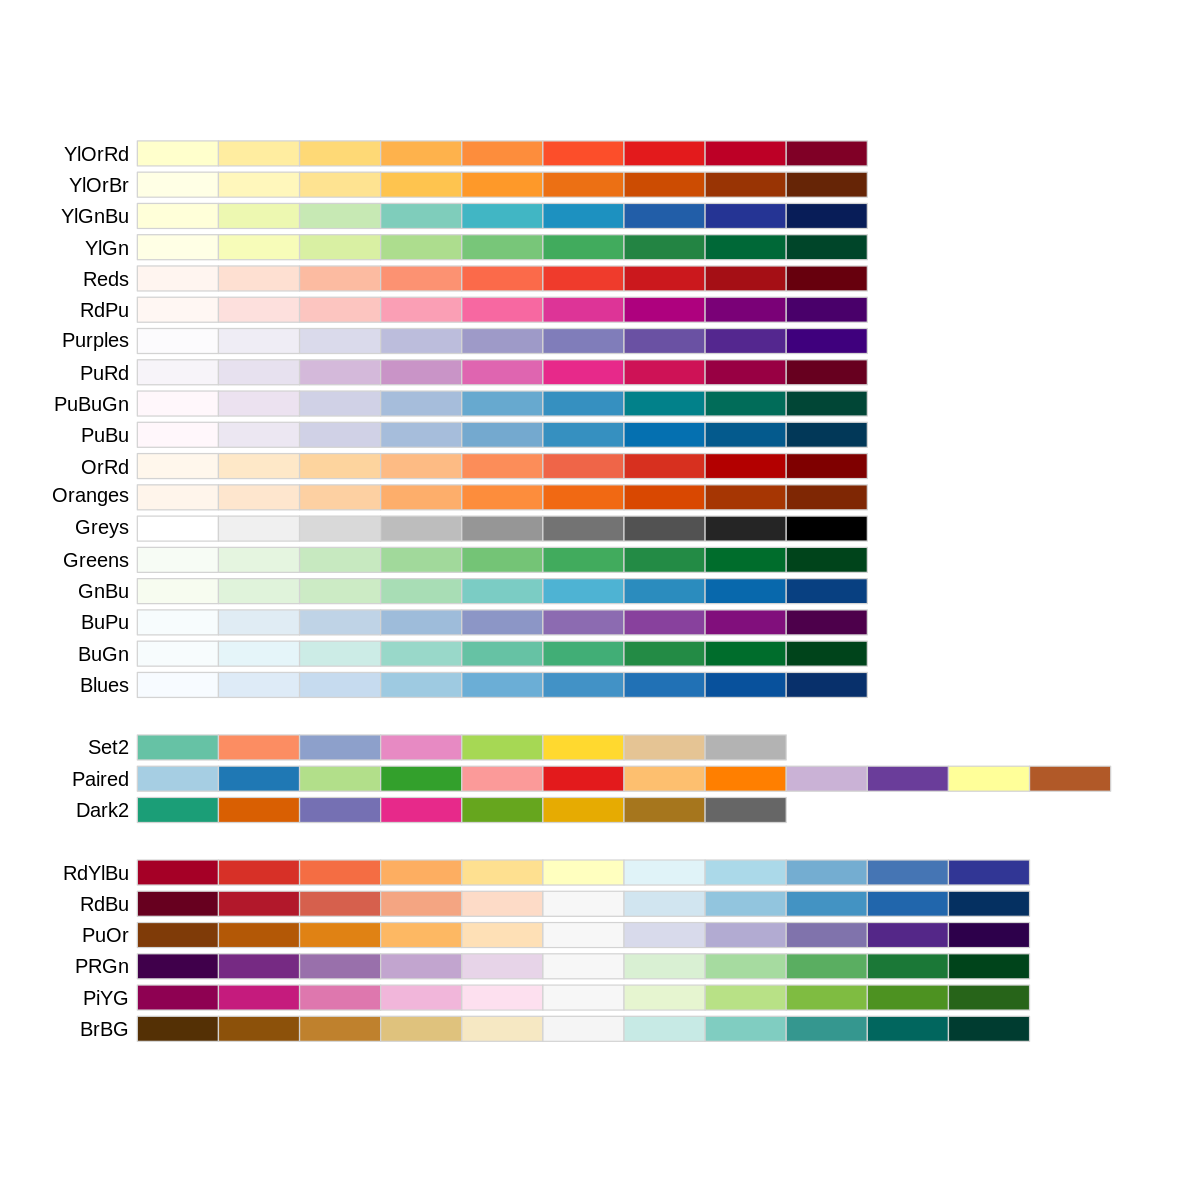

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



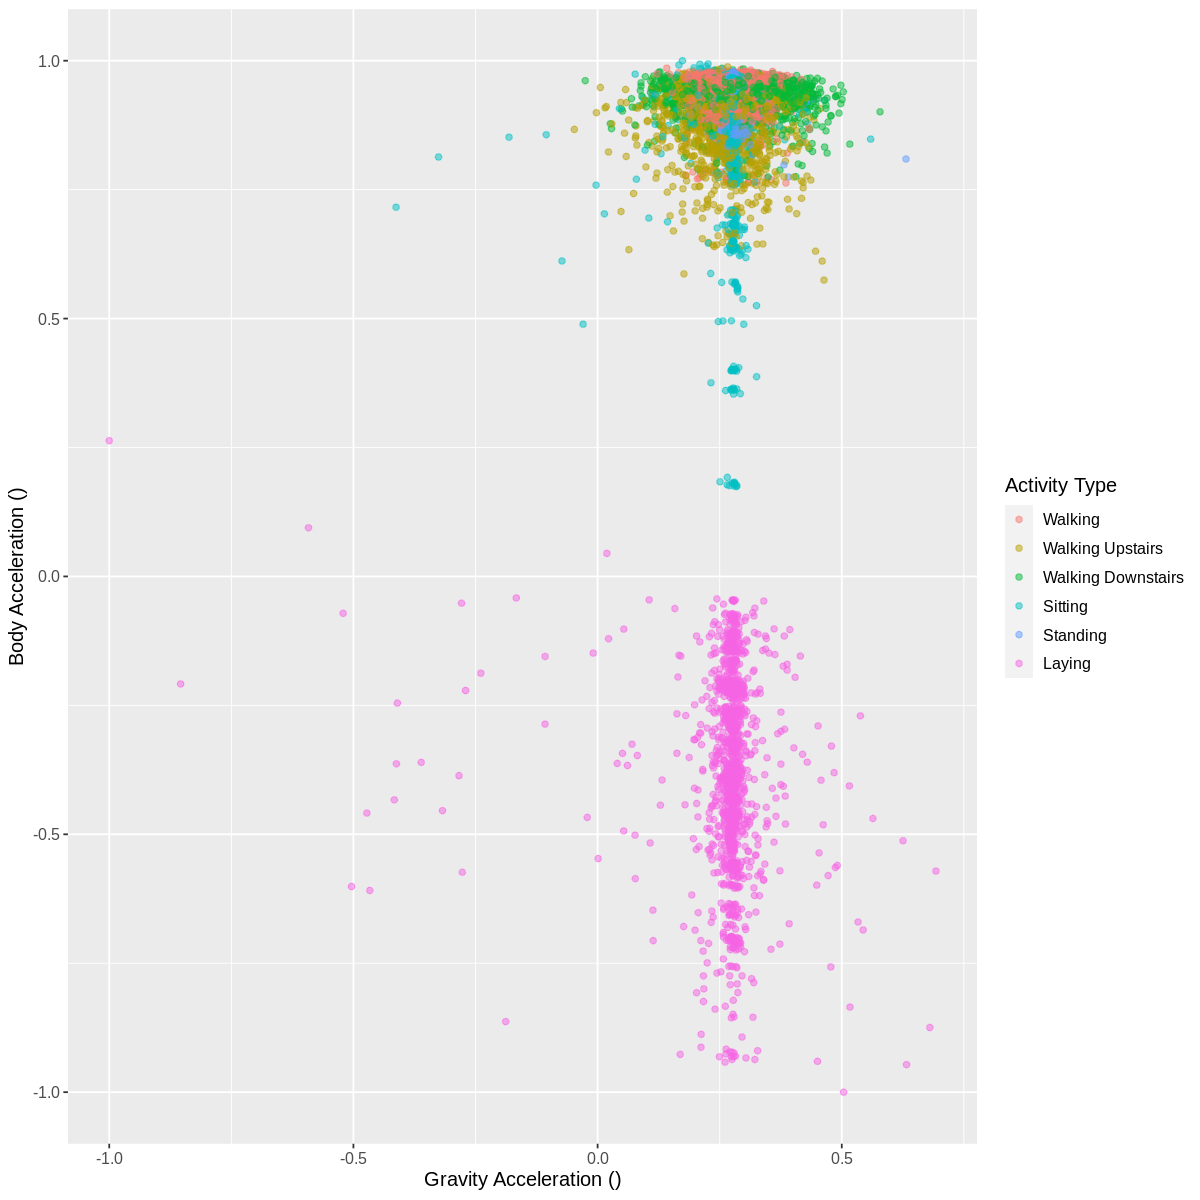

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



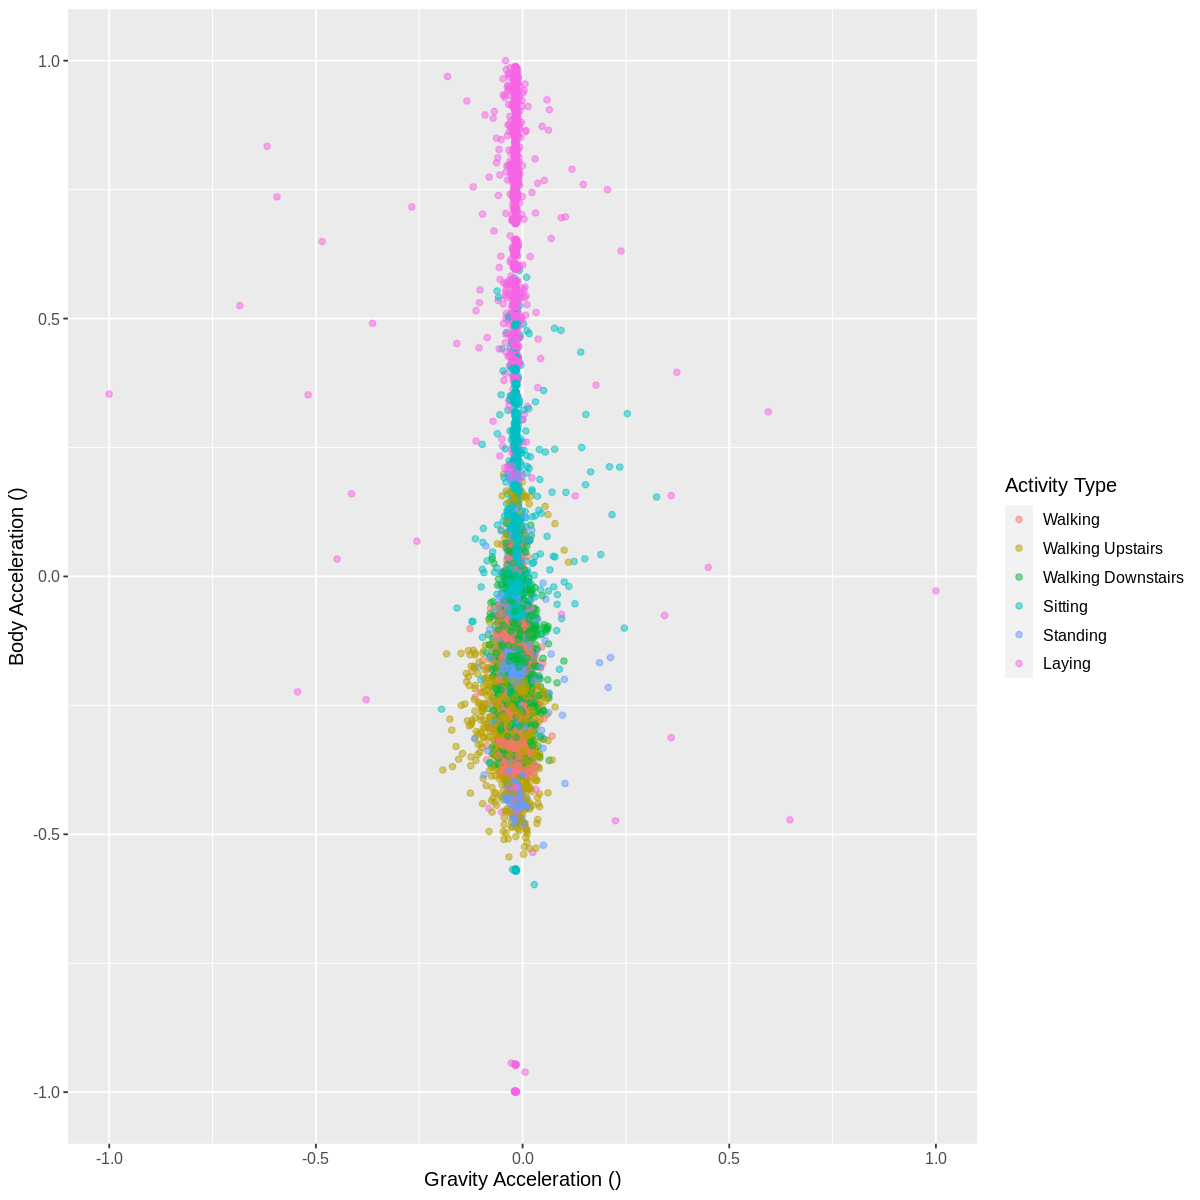

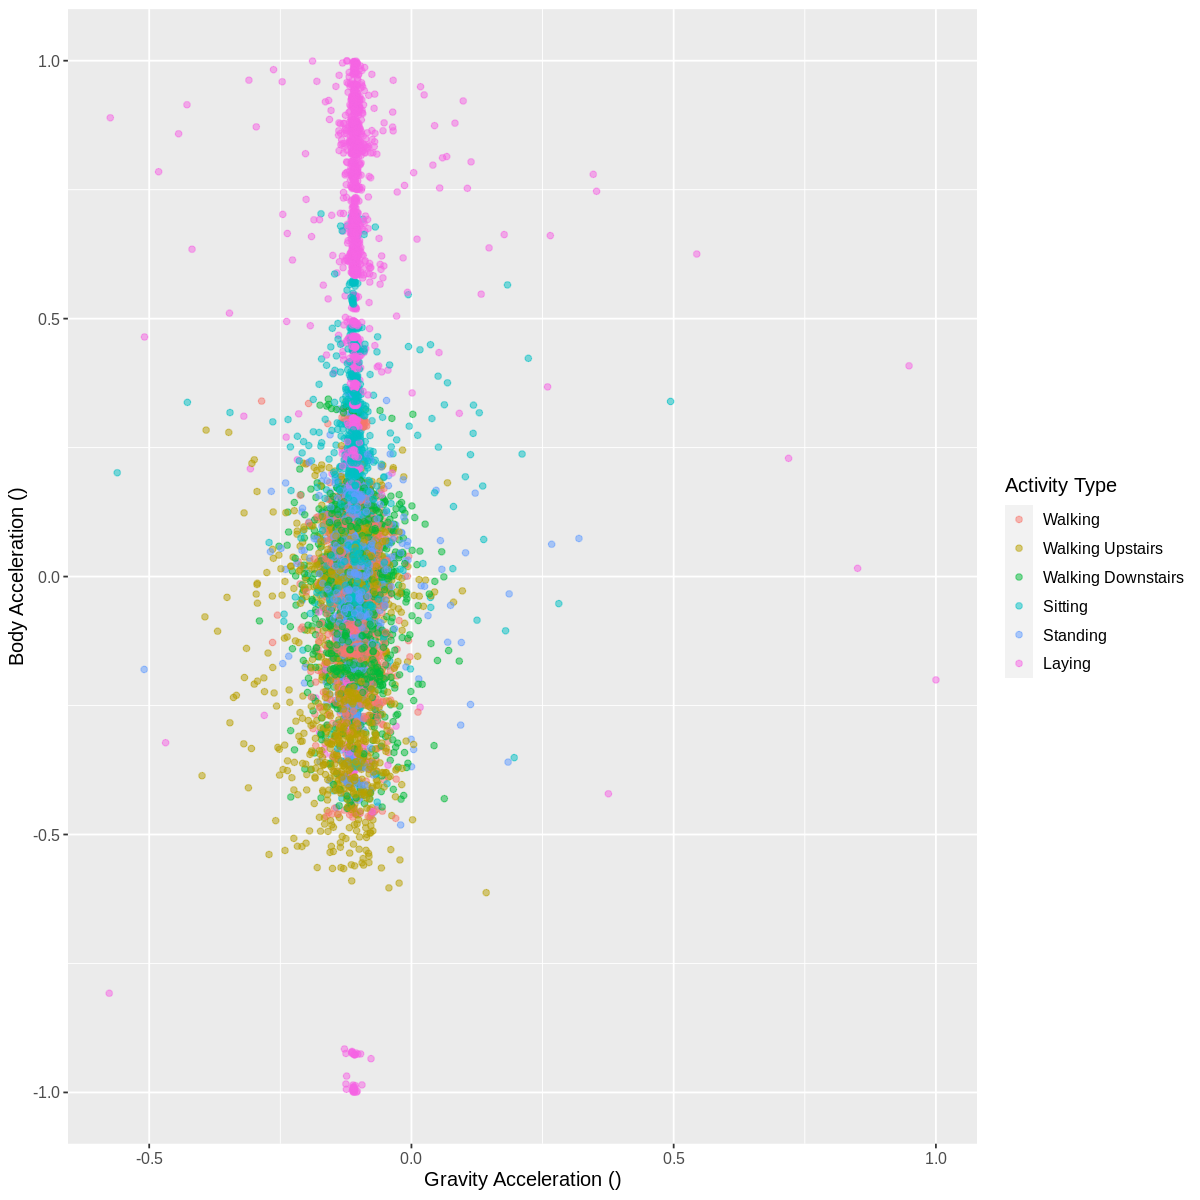

In [199]:
# Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do 
# (this is exploratory data analysis). An example of a useful visualization could be one that compares the 
# distributions of each of the predictor variables you plan to use in your analysis.


# create scatter plot of tumor cell concavity versus smoothness,
# labeling the points be diagnosis class
options(repr.plot.width=10, repr.plot.height=10)
library(RColorBrewer)
display.brewer.all(colorblindFriendly = TRUE)

body_gravity_x <- training_subset %>%
  ggplot(aes(x = tBodyAcc_mean_X, y = tGravityAcc_mean_X, color = activity_label)) +
  geom_point(alpha = 0.5) +
  labs(x = "Gravity Acceleration ()", y = "Body Acceleration ()", color = "Activity Type") +
scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying")) +
  theme(text = element_text(size = 12))
#scale_x_log10(labels = comma) +
 # scale_y_log10(labels = comma)
            
body_gravity_x


body_gravity_y <- training_subset %>%
  ggplot(aes(x = tBodyAcc_mean_Y, y = tGravityAcc_mean_Y, color = activity_label)) +
  geom_point(alpha = 0.5) +
  labs(x = "Gravity Acceleration ()", y = "Body Acceleration ()", color = "Activity Type") +
scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying")) +
  theme(text = element_text(size = 12))
body_gravity_y

body_gravity_z <- training_subset %>%
  ggplot(aes(x = tBodyAcc_mean_Z, y = tGravityAcc_mean_Z, color = activity_label)) +
  geom_point(alpha = 0.5) +
  labs(x = "Gravity Acceleration ()", y = "Body Acceleration ()", color = "Activity Type") +
scale_color_brewer(palette = "Set2") +
  scale_color_discrete(labels = c("Walking", "Walking Upstairs", "Walking Downstairs", "Sitting", "Standing", "Laying")) +
  theme(text = element_text(size = 12))
body_gravity_z


In [200]:
# todo: explain tables, diagrams, put titles, make sure all steps are done